# **Projet de modélisation statistique**
*Tony Lauze - Amine Zarig*

## **1) Importation des données et statistiques descriptives**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import eda

In [4]:
"""Changement de directory pour lire les fichiers"""
import os
dir = os.getcwd() #trouver le directory actuel 
print( f'Le chemin de travail actuel est : {dir}')
os.chdir(dir)


Le chemin de travail actuel est : /Users/aminerazig/Desktop/ENSAE 2A/Seminaire-modelisation-2A-ENSAE


In [5]:
path = 'GWMF_Dataset.DAT'

In [6]:
df = pd.read_csv(path)
df = df[['abs_gwmf', 'tp', 'lnsp', 'temp19', 'temp9', 'temp2', 'temp0', 'u19',
       'u9', 'u2', 'u0', 'v19', 'v9', 'v2', 'v0', 'sza', 'tp_mean', 'tp_sd']]
df.columns

Index(['abs_gwmf', 'tp', 'lnsp', 'temp19', 'temp9', 'temp2', 'temp0', 'u19',
       'u9', 'u2', 'u0', 'v19', 'v9', 'v2', 'v0', 'sza', 'tp_mean', 'tp_sd'],
      dtype='object')

In [7]:
df.describe()

,abs_gwmf,tp,lnsp,temp19,temp9,temp2,temp0,u19,u9,u2,u0,v19,v9,v2,v0,sza,tp_mean,tp_sd
count,16197.000000,1.619700e+04,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000
mean,0.000989,2.864759e-04,11.512132,199.817467,247.052769,288.693248,299.461071,2.737127,1.991811,-2.205544,-1.838503,0.094881,0.525721,-0.904514,-0.008962,88.395843,0.000285,0.000413
std,0.001554,8.639495e-04,0.032755,2.246374,1.635580,1.688561,2.094615,6.953460,10.229109,5.754826,3.817468,3.238477,5.275595,3.048480,3.266805,45.214723,0.000464,0.000672
min,0.000000,0.000000e+00,11.023088,192.611940,237.875080,270.309480,276.263500,-21.297882,-20.244250,-17.597311,-11.426922,-11.014263,-21.263680,-17.654207,-13.621062,3.610009,0.000000,0.000000
25%,0.000335,6.938894e-18,11.518892,198.255840,246.173110,288.144840,298.538970,-1.579005,-5.605468,-6.175981,-4.783611,-2.124521,-2.758159,-2.732455,-2.043558,47.429510,0.000020,0.000031
50%,0.000614,2.459846e-05,11.522152,199.836960,247.168410,288.880460,299.854370,3.421588,0.616856,-2.870982,-2.125209,0.118922,0.378418,-0.788899,-0.004423,88.478490,0.000087,0.000123
75%,0.001137,1.636641e-04,11.524135,201.335070,248.053240,289.539180,300.777100,7.707038,8.695124,0.832136,0.299289,2.243451,3.644465,1.126128,2.335671,129.414080,0.000358,0.000546
max,0.072712,2.541273e-02,11.549719,207.770570,252.279100,295.087300,309.417700,23.228626,35.223260,27.219698,14.437126,14.463321,18.420069,12.390946,8.689446,176.084260,0.006860,0.007757


La variable cible est **"abs_gwmf"**, valeur absolue de la quantité de mouvement d'ondes internes de gravité, quantité clef renseignant sur les effets de ces ondes. Ces observations ont été obtenues grâce à des ballons pressurisés circulant dans l'atmosphère à une altitude de 18 à 20 km (durée de vie 2 à 3 mois).

Les variables explicatives, provenant de modèles numériques de climat (ECMWF), sont :

    => tp : précipitations,
    => lnsp : logarithme de la pression de surface,
    => temp19, temp9, temp2, temp0 : la température, à plusieurs altitudes,
    => u19,u9,u2,u0,v19,v9,v2,v0 : le vent, à plusieurs altitudes (il y a les 2 composantes est-ouest et nord-sud),
    => sza : solar zenith angle = angle entre la direction du zénith et la direction du Soleil,
    => tp_mean : moyenne précipitations,
    => tp_sd : écart-type précipitations,
    
De plus, "balloon" indique le numéro du ballon qui a permis d'obtenir l'observation "abs_gwmf".


In [8]:
# Analyse des valeurs manquantes du data frame : 
eda.create_unique(df)

,Column_name,Data_type,Number_of_unique,Number_of_missing,Percentage_of_missing,Unique_values
0,abs_gwmf,float64,15889,0,0.0,More than 15 unique values
1,tp,float64,3206,0,0.0,More than 15 unique values
2,lnsp,float64,10460,0,0.0,More than 15 unique values
3,temp19,float64,15784,0,0.0,More than 15 unique values
4,temp9,float64,15531,0,0.0,More than 15 unique values
5,temp2,float64,14986,0,0.0,More than 15 unique values
6,temp0,float64,15263,0,0.0,More than 15 unique values
7,u19,float64,16060,0,0.0,More than 15 unique values
8,u9,float64,16078,0,0.0,More than 15 unique values
9,u2,float64,16034,0,0.0,More than 15 unique values


/Users/aminerazig/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


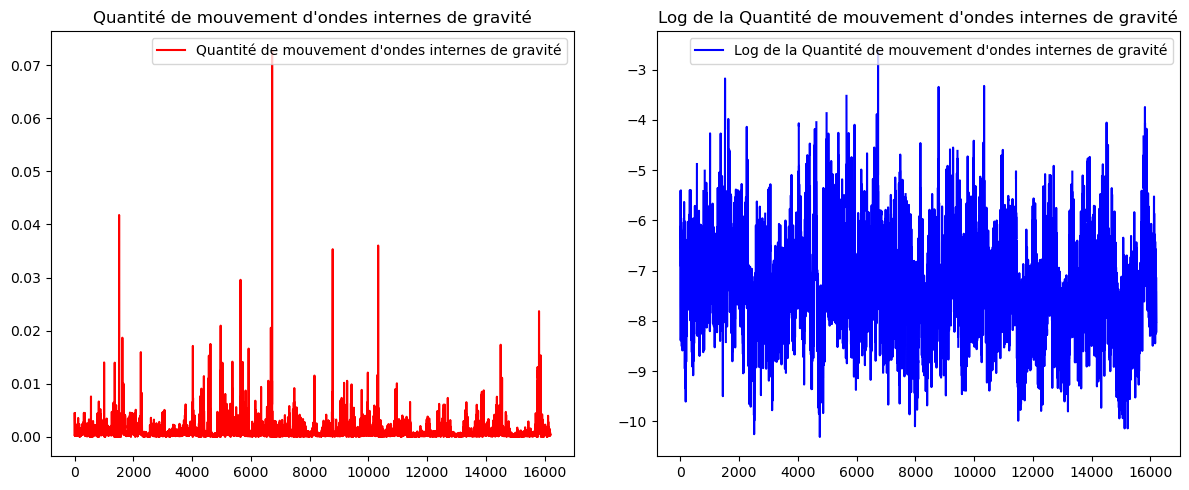

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# quantité de mouvement d'ondes internes de gravité
ln1 = axs[0].plot(df['abs_gwmf'], c='r', label="Quantité de mouvement d'ondes internes de gravité")
axs[0].legend()
axs[0].set_title("Quantité de mouvement d'ondes internes de gravité")

# log de la quantité de mouvement d'ondes internes de gravité
y = np.log(df['abs_gwmf'])
ln2 = axs[1].plot(y, c='b', label="Log de la Quantité de mouvement d'ondes internes de gravité")
axs[1].legend()
axs[1].set_title("Log de la Quantité de mouvement d'ondes internes de gravité")

plt.tight_layout() 
plt.show()


### Plan d'exploration : 

    -> Préparation des données

    -> Feature engineering : créer de nouvelles variables (features) qui pourraient aider à améliorer la prédiction. Par exemple, des variables telles que les retards (lags) de la variable cible, des moyennes mobiles, ou des indicateurs de tendance pourraient être utiles.

    -> Sélection des variables : Il est souvent utile de sélectionner un sous-ensemble des variables explicatives les plus pertinentes pour la prédiction. Cela peut être fait à travers des méthodes statistiques (comme le test chi² pour les variables catégorielles, l'analyse de la variance pour les variables continues) ou des méthodes plus complexes comme la sélection de caractéristiques basée sur des modèles de machine learning.

        -> Division des données (train test)

            -> Choix du modèle 

                -> Entraînement du modèle 

                    -> Évaluation du modèle : performance du modèle sur l'ensemble de test à l'aide de métriques appropriées

                        -> Optimisation et ajustements
                        
                            -> Prédictions

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np


X = df.drop('abs_gwmf', axis=1)
y = df['abs_gwmf']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation des features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)

# Évaluation du modèle
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"RMSE: {rmse}")


RMSE: 0.0012781150344170127


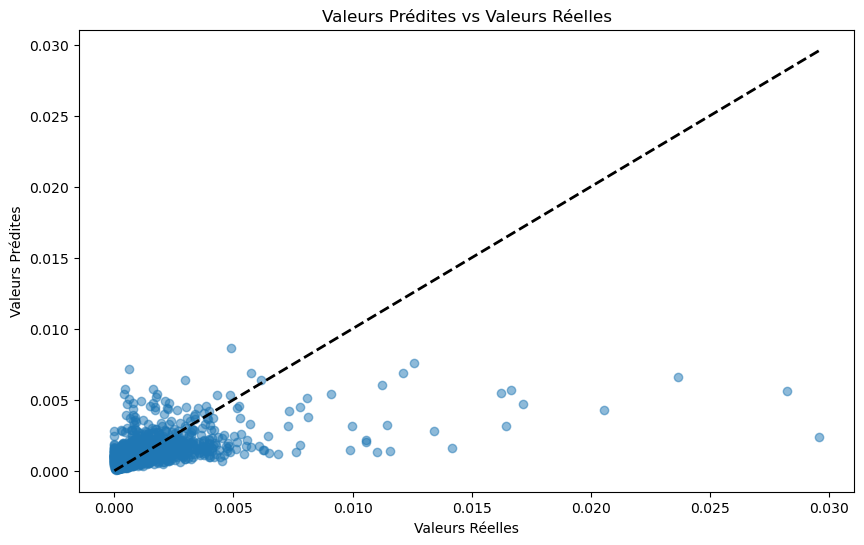

    Feature  Importance
6       u19    0.133209
1      lnsp    0.076698
16    tp_sd    0.076664
9        u0    0.071919
4     temp2    0.071696
5     temp0    0.058285
2    temp19    0.056963
7        u9    0.053099
8        u2    0.052384
14      sza    0.051202
13       v0    0.050360
11       v9    0.048301
3     temp9    0.040993
15  tp_mean    0.040687
0        tp    0.040220
10      v19    0.039311
12       v2    0.038011


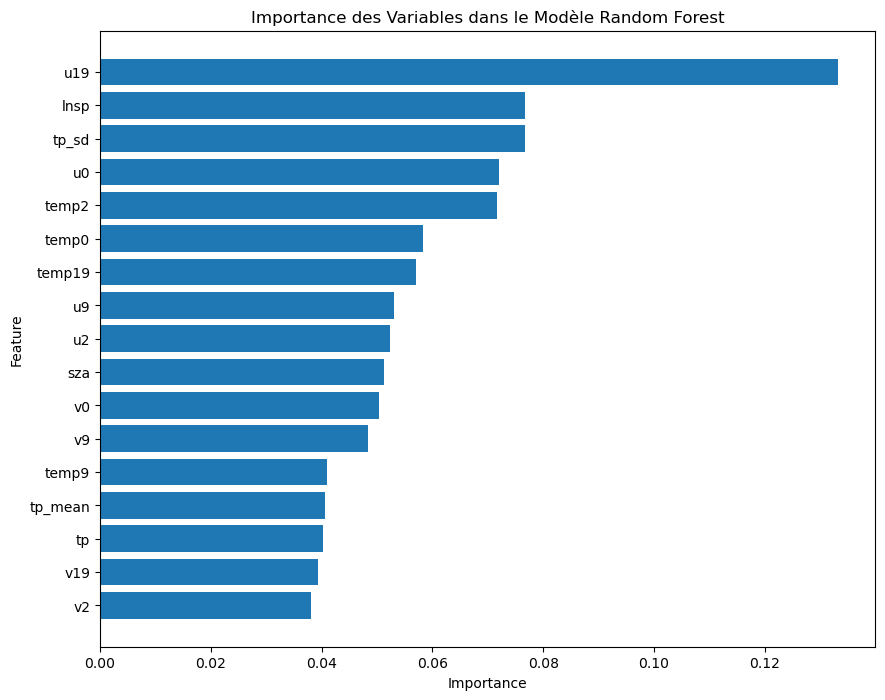

/Users/aminerazig/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


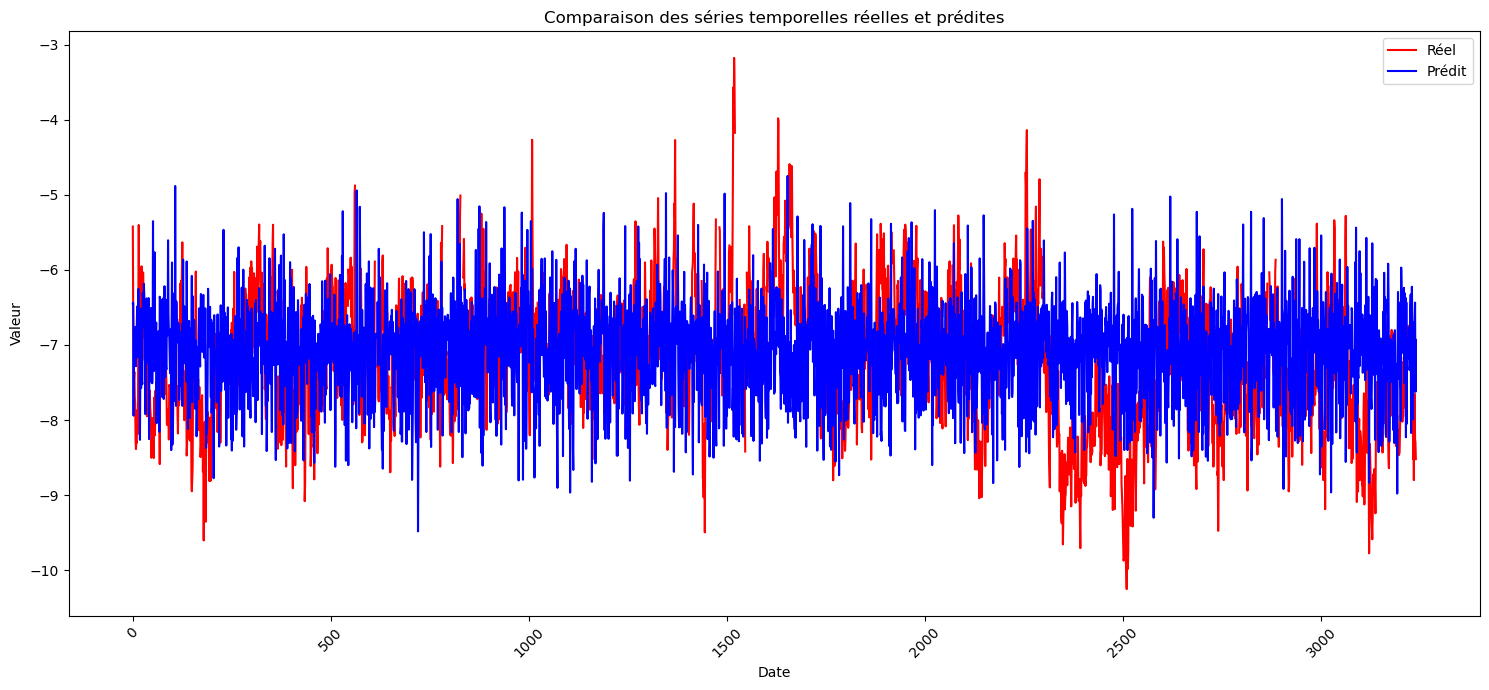

In [32]:

# 1. Graphique des valeurs prédites vs valeurs réelles
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valeurs Réelles')
plt.ylabel('Valeurs Prédites')
plt.title('Valeurs Prédites vs Valeurs Réelles')
plt.show()

# importance des features 
# ( métrique calculée en fonction de la contribution de chaque variable explicative à la réduction de l'impureté dans les arbres du modèle Random Forest.)
features = df.drop('abs_gwmf', axis=1).columns
importances = model.feature_importances_

# 2. Graphique de l'importance des features
feature_names = X.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)

plt.figure(figsize=(10, 8))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Importance des Variables dans le Modèle Random Forest')
plt.gca().invert_yaxis()  # Inverser l'axe Y pour que la variable la plus importante soit en haut
plt.show()

# 3. Graph prédictions 
Y_t = df['abs_gwmf'][:len(y_pred)]
plt.figure(figsize=(15, 7))
plt.plot(np.log(Y_t),c='r', label='Réel')
plt.plot(np.log(y_pred), c='b',label='Prédit')
plt.xlabel('Date')
plt.ylabel('Valeur')
plt.title('Comparaison des séries temporelles réelles et prédites')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Approche paramétrique : 

/var/folders/85/w86zwk1d6rsg9ct11l1475ww0000gn/T/ipykernel_62140/46980839.py:16: RuntimeWarning: invalid value encountered in log
  df_test['Predicted'] = np.log(y_pred)
/Users/aminerazig/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


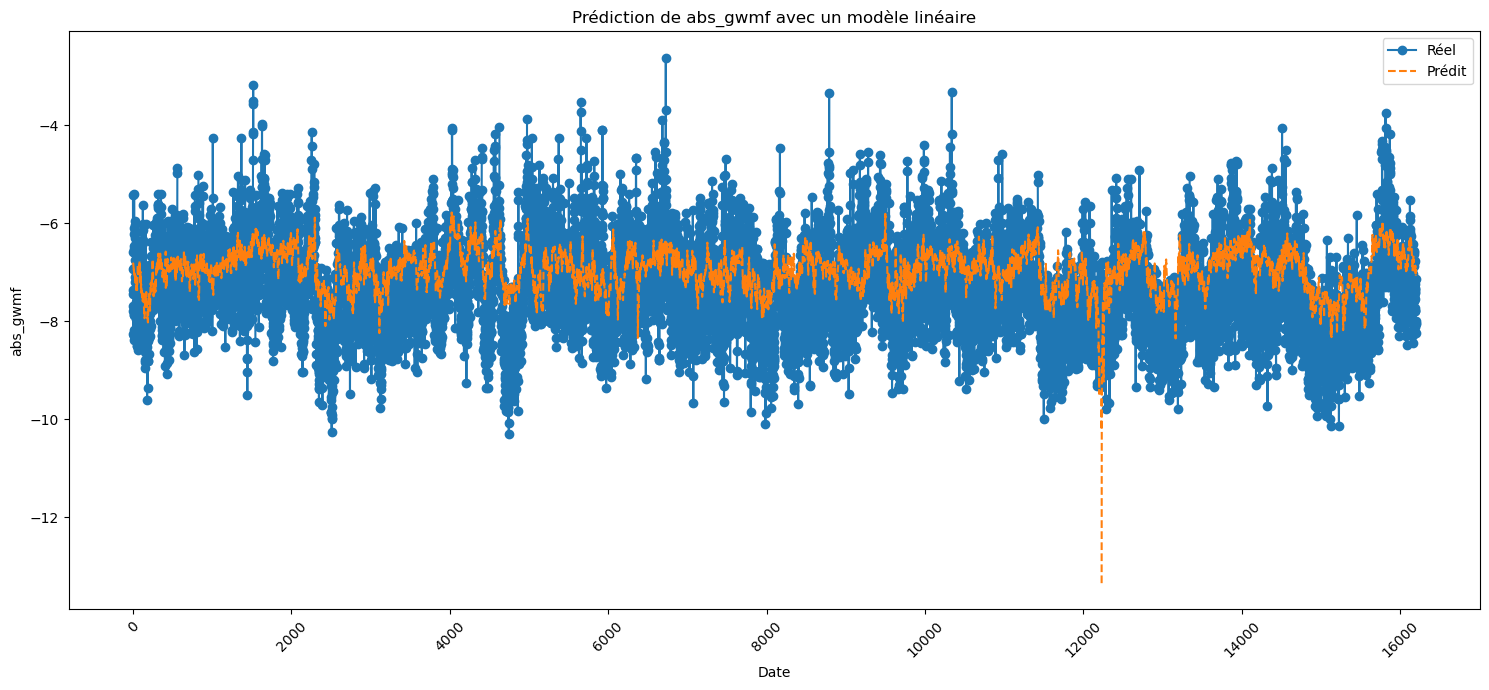

In [34]:
from sklearn.linear_model import LinearRegression

X = df[['tp', 'lnsp', 'temp19', 'temp9', 'temp2', 'temp0', 'u19', 'u9', 'u2', 'u0', 'v19', 'v9', 'v2', 'v0', 'sza', 'tp_mean', 'tp_sd']]
y = df['abs_gwmf']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)

# Prédiction
y_pred = model.predict(X)

# Ajout des prédictions dans le DataFrame de test pour le tracé
df_test = df.copy()
df_test['Predicted'] = np.log(y_pred)

plt.figure(figsize=(15, 7))
plt.plot(np.log(df['abs_gwmf']), label='Réel', marker='o')
plt.plot(df_test['Predicted'], label='Prédit', linestyle='--')
plt.xlabel('Date')
plt.ylabel('abs_gwmf')
plt.title('Prédiction de abs_gwmf avec un modèle linéaire')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


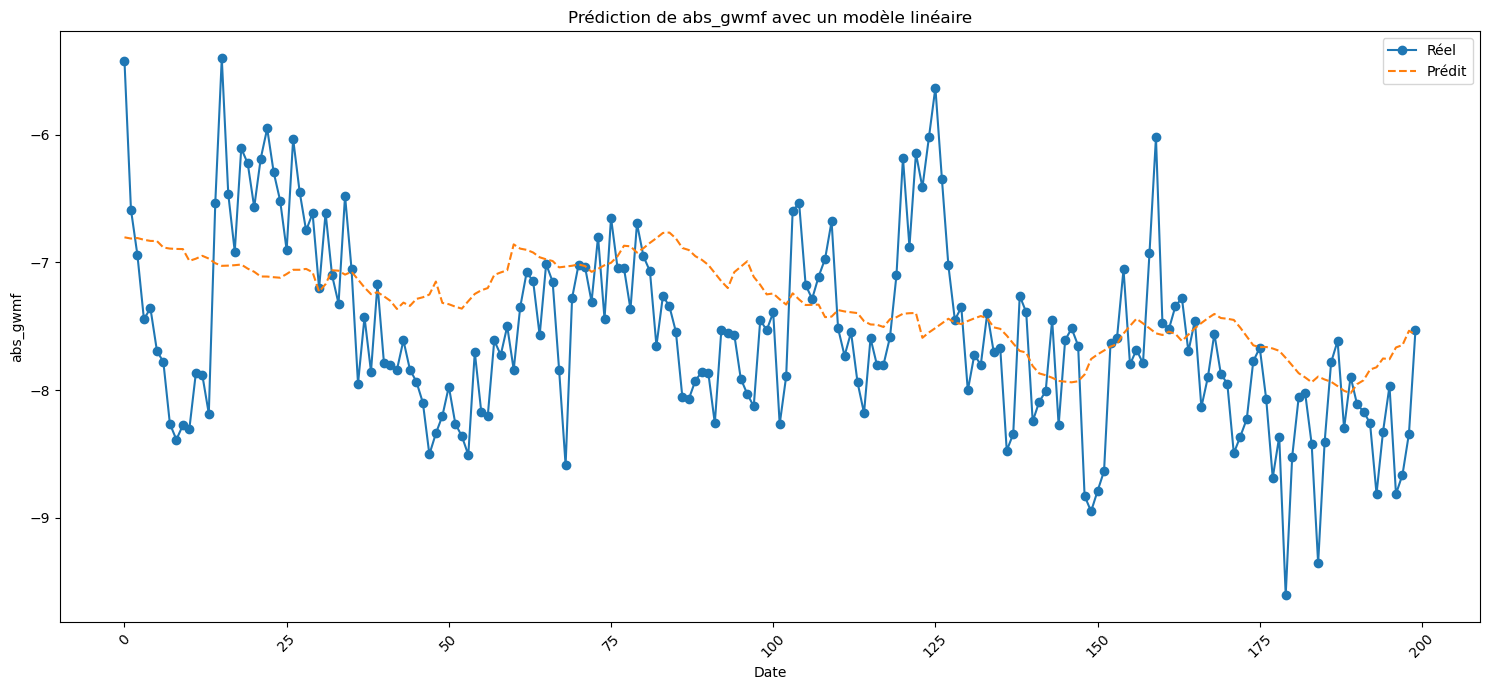

In [35]:
plt.figure(figsize=(15, 7))
plt.plot(np.log(df['abs_gwmf'][:200]), label='Réel', marker='o')
plt.plot(df_test['Predicted'][:200], label='Prédit', linestyle='--')
plt.xlabel('Date')
plt.ylabel('abs_gwmf')
plt.title('Prédiction de abs_gwmf avec un modèle linéaire')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

    -> UNDERFITTING 


# FIN ANALYSE AMINE

___________________________________
___________________________________

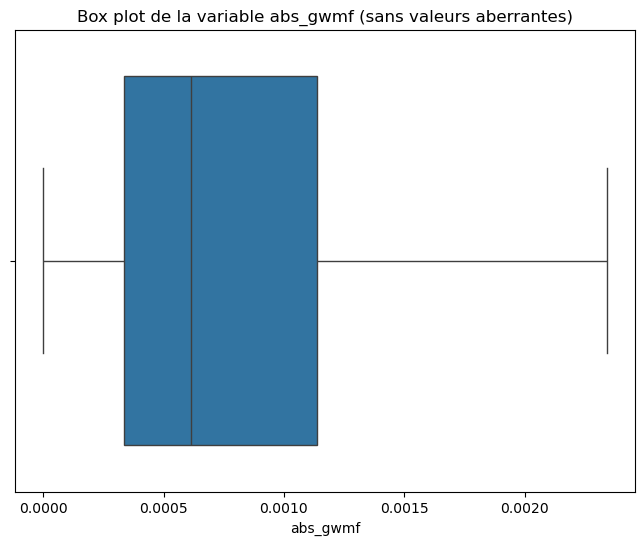

In [182]:

# Tracer un box plot de la variable abs_gwmf sans les valeurs aberrantes
plt.figure(figsize=(8, 6))
sns.boxplot(x='abs_gwmf', data=df, showfliers=False)
plt.title('Box plot de la variable abs_gwmf (sans valeurs aberrantes)')
plt.xlabel('abs_gwmf')
plt.show()


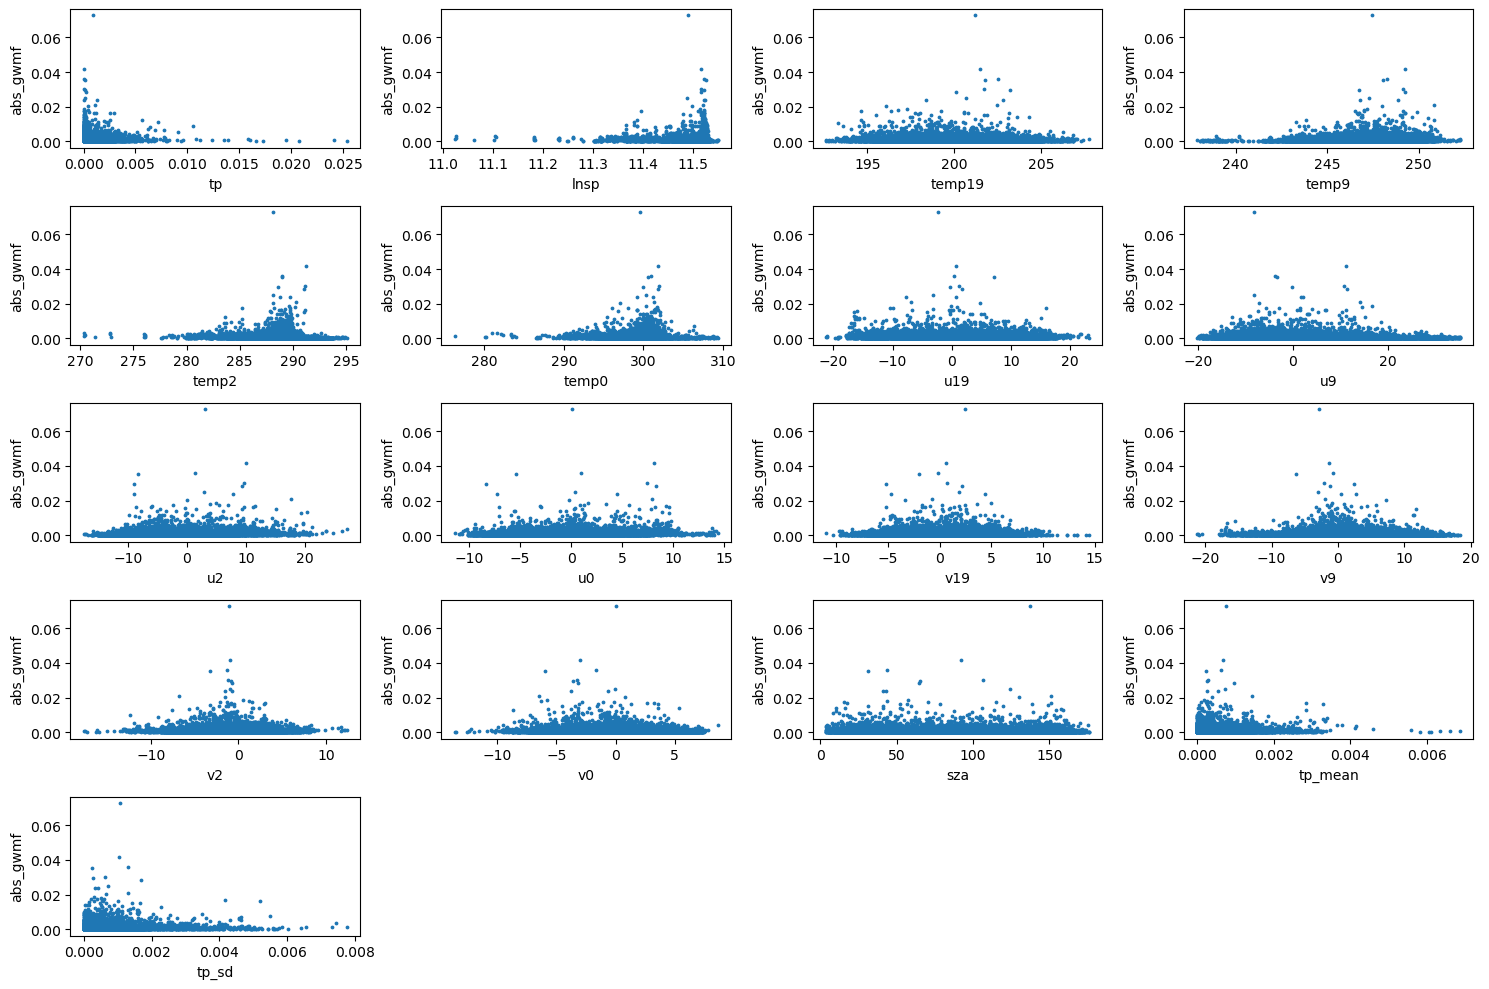

In [183]:
"""Observation des distributions"""

# Définir le nombre de colonnes pour organiser les graphiques
num_cols = 4
num_rows = (len(df.columns) - 1) // num_cols + 1

# Créer une nouvelle figure avec une taille spécifiée
plt.figure(figsize=(15, 10))

# Tracer les graphiques de dispersion pour chaque variable
for i, col in enumerate(df.columns.drop('abs_gwmf')):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.scatter(df[col], df['abs_gwmf'], s=3)  # Ajuster la taille des points ici    
    plt.xlabel(col)
    plt.ylabel('abs_gwmf')

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.savefig('distribution_graphs.jpeg')  # Vous pouvez changer le format ici si besoin
plt.show()

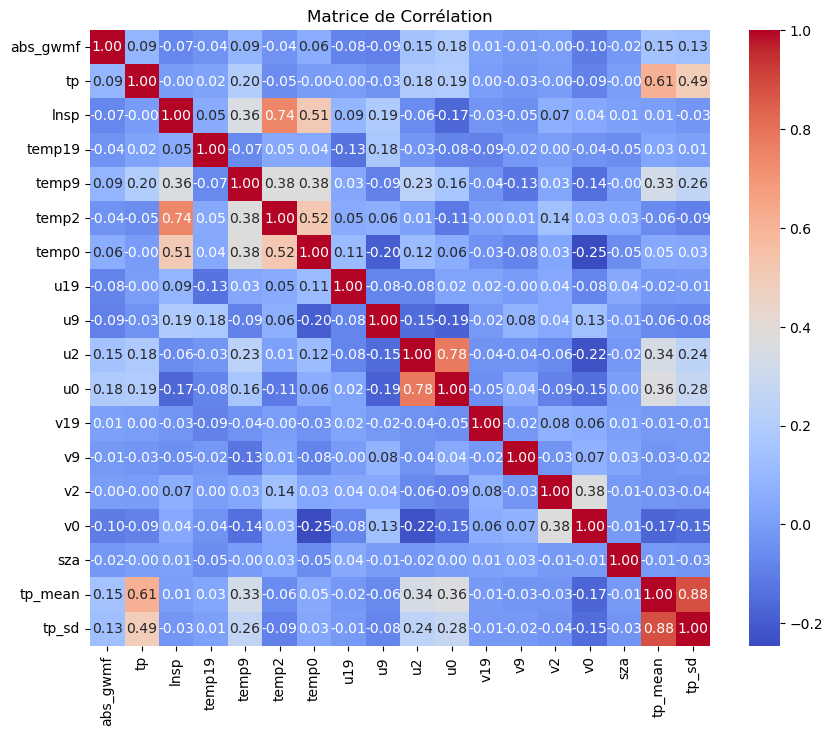

In [184]:
"""Matrice de corrélation des variables"""

import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

# Créer un heatmap de la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de Corrélation')
plt.savefig('matrice_corr.jpeg')  # Vous pouvez changer le format ici si besoin
plt.show()

## **2) Modélisation : comparaison des approches paramétriques (régression, Lasso) et non-paramétriques (Random-Forest)**

In [185]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, LassoCV, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import add_dummy_feature
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingRegressor

In [186]:
"""Normalisation des données"""

# Séparation des données en variables explicatives (X) et variable cible (y)
X = df.drop('abs_gwmf', axis=1)
y = df['abs_gwmf']

# Séparation des données en ensemble d'entraînement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation des données
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Ajout d'une constante à X_train_normalized et X_test_normalized
X_train_normalized = sm.add_constant(X_train_normalized)
X_test_normalized = sm.add_constant(X_test_normalized)

In [124]:
"""Régression linéaire simple"""

def regression_lineaire_multivariable(dvf, variable_a_expliquer, variables_explicatives):    
    # Séparer la variable dépendante et les variables indépendantes
    y = dvf[variable_a_expliquer].copy()
    X = dvf[variables_explicatives].copy()

    column_names = X.columns
    
    X = scaler.fit_transform(X)
    X = pd.DataFrame(X, columns=column_names)

    X = sm.add_constant(X)


    # Initialiser le modèle de régression linéaire avec des estimateurs de variance robustes
    model = sm.OLS(y, X).fit(cov_type='HC3')

    # Afficher les résultats de la régression
    print(model.summary())


In [125]:
var_base = ['tp', 'lnsp', 'temp19', 'temp9', 'temp2', 'temp0', 'u19',
       'u9', 'u2', 'u0', 'v19', 'v9', 'v2', 'v0', 'sza', 'tp_mean', 'tp_sd']

regression_lineaire_multivariable(df, 'abs_gwmf', var_base)

                            OLS Regression Results                            
Dep. Variable:               abs_gwmf   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     79.79
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          9.37e-267
Time:                        08:19:08   Log-Likelihood:                 82331.
No. Observations:               16197   AIC:                        -1.646e+05
Df Residuals:                   16179   BIC:                        -1.645e+05
Df Model:                          17                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010   1.18e-05     83.829      0.0

1.520328050121885e-06


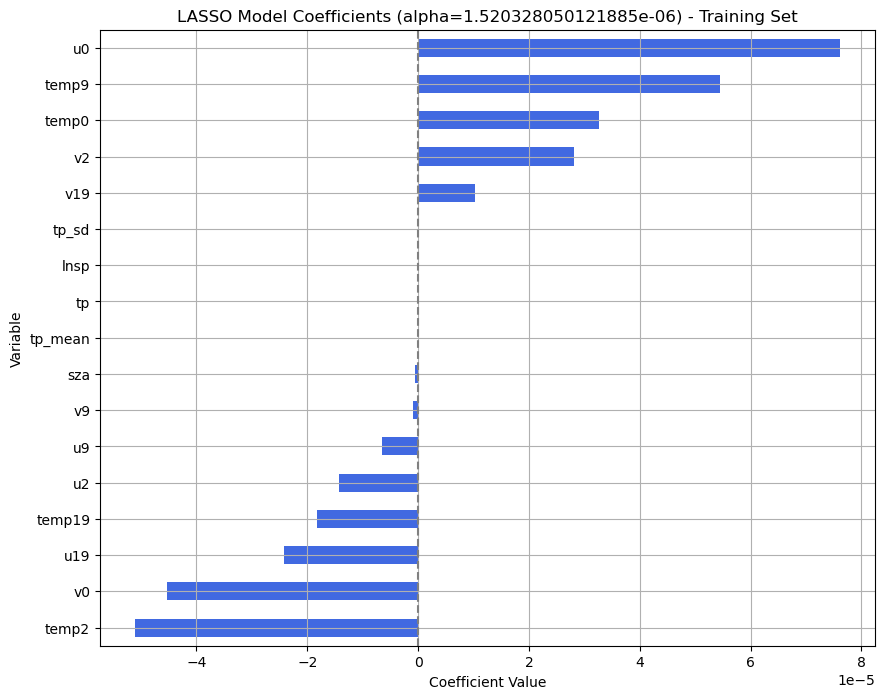

In [132]:
"""Régression LASSO"""

lasso_cv_model = models['Lasso Regression'].fit(X_train, y_train)

print(lasso_cv_model.alpha_)

# Extraire les coefficients du modèle Lasso
lasso_coefficients = pd.Series(lasso_cv_model.coef_, index=X_train.columns)

# Trier les coefficients par valeur
lasso_coefficients_sorted = lasso_coefficients.sort_values()

# Tracer un graphique de barres horizontales pour les coefficients
plt.figure(figsize=(10, 8))
lasso_coefficients_sorted.plot(kind='barh', color='royalblue')
plt.axvline(x=0, color='gray', linestyle='--')
plt.title(f'LASSO Model Coefficients (alpha={lasso_cv_model.alpha_}) - Training Set')
plt.xlabel('Coefficient Value')
plt.ylabel('Variable')
plt.grid(True)
plt.show()

In [152]:
""" Récupération des variables choisies par l'algorithme random forest """

# Train the Random Forest model
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train, y_train)

feature_names = X_train.columns
feature_importances = random_forest.feature_importances_

# Combine feature names and importances into a dictionary
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sort feature importance dictionary by importance values (optional)
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print feature names and their importances
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")

top_10_features = [feature for feature, importance in sorted_feature_importance[:10]]
top_10_features

u19: 0.1316480180795762
temp2: 0.07982095225601953
u0: 0.0787110992027122
tp_sd: 0.07532767756222691
lnsp: 0.0721329413426429
temp0: 0.057289518907097034
u2: 0.056413849806508494
temp19: 0.0562811636884862
sza: 0.05103293786497988
u9: 0.04902346009874214
v0: 0.047699520421028575
v9: 0.04678651722406743
v19: 0.04337603406202387
tp: 0.041147198635133005
temp9: 0.04027227342406471
tp_mean: 0.03680646615043026
v2: 0.03623037127426056


In [187]:
var_random_forest = ['u19', 'temp2', 'u0', 'tp_sd', 'lnsp', 'temp0', 'u2', 'temp19', 'sza', 'u9']

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

# Définir les hyperparamètres à rechercher avec Randomized Search
random_params = {
    'n_estimators': randint(100, 1000),
    'max_features': ['auto', 'sqrt'],
    'max_depth': randint(10, 100),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False]
}

# Créer un modèle Random Forest
rf = RandomForestRegressor(random_state=42)

# Recherche aléatoire des meilleurs hyperparamètres
random_search = RandomizedSearchCV(rf, param_distributions=random_params, n_iter=100, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train, y_train)

# Obtenez les meilleurs paramètres trouvés par Randomized Search
best_random_params = random_search.best_params_

# Définir une grille plus précise autour des meilleurs paramètres trouvés
param_grid = {
    'n_estimators': [best_random_params['n_estimators'] - 50, best_random_params['n_estimators'], best_random_params['n_estimators'] + 50],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [best_random_params['max_depth'] - 10, best_random_params['max_depth'], best_random_params['max_depth'] + 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True]
}

# Recherche en grille des meilleurs hyperparamètres autour des meilleurs paramètres trouvés par Randomized Search
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Obtenez les meilleurs paramètres trouvés par Grid Search
best_params = grid_search.best_params_

# Créer un nouveau modèle Random Forest avec les meilleurs paramètres
best_rf_model = RandomForestRegressor(**best_params)


In [188]:
"""Initialisation des modèles à comparer"""

models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': LassoCV(cv=KFold(n_splits=10, shuffle=True, random_state=42)),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'KNN' : KNeighborsRegressor()
}

In [163]:
"""Entrainement des modèles et stockage des erreurs RMSE"""

# Dictionnaire pour stocker les erreurs RMSE pour chaque modèle
rmse_errors = {name: [] for name in models}

# Sélectionner les variables pour KNN
X_train_knn = X_train[var_random_forest]

# Dictionnaire pour stocker les erreurs RMSE pour chaque modèle
rmse_errors = {name: [] for name in models}

# Boucle sur chaque modèle
for name, model in models.items():
    if name == 'KNN':
        # Utiliser seulement les variables sélectionnées pour KNN
        rmse_scores = cross_val_score(model, X_train_knn, y_train, cv=10, scoring='neg_root_mean_squared_error')
    else:
        # Utiliser toutes les variables pour les autres modèles
        rmse_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error')
    
    rmse_errors[name] = -rmse_scores  # Convertir en valeurs positives

In [191]:
"""Autres erreurs"""
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score, cross_val_predict


# Dictionnaire pour stocker les autres métriques d'évaluation
other_metrics = {name: {'MAE': [], 'MAPE': [], 'R^2': [], 'Max Absolute Error': []} for name in models}

# Boucle sur chaque modèle
for name, model in models.items():
    if name == 'KNN':
        # Utiliser seulement les variables sélectionnées pour KNN
        predictions = cross_val_predict(model, X_train_knn, y_train, cv=10)
    else:
        # Utiliser toutes les variables pour les autres modèles
        predictions = cross_val_predict(model, X_train, y_train, cv=10)
    
    # Calculer les métriques d'évaluation
    mae = mean_absolute_error(y_train, predictions)
    mape = mean_absolute_percentage_error(y_train, predictions)
    r2 = r2_score(y_train, predictions)
    max_absolute_error = max(np.abs(y_train - predictions))
    
    # Stocker les métriques dans le dictionnaire
    other_metrics[name]['MAE'] = mae
    other_metrics[name]['MAPE'] = mape
    other_metrics[name]['R^2'] = r2
    other_metrics[name]['Max Absolute Error'] = max_absolute_error

In [195]:

# Convertir le dictionnaire other_metrics en DataFrame
other_metrics_df = pd.DataFrame(other_metrics)
    


In [196]:
other_metrics_df.head()

,Linear Regression,Lasso Regression,Random Forest,Gradient Boosting,KNN
MAE,6.832559e-04,6.869844e-04,5.495080e-04,6.343848e-04,7.406813e-04
MAPE,1.100738e+11,1.063347e+11,1.111608e+11,1.122954e+11,9.489124e+10
R^2,6.212335e-02,5.841916e-02,2.751838e-01,1.403978e-01,-9.970099e-02
Max Absolute Error,7.137646e-02,7.146695e-02,7.011622e-02,7.139835e-02,7.145819e-02


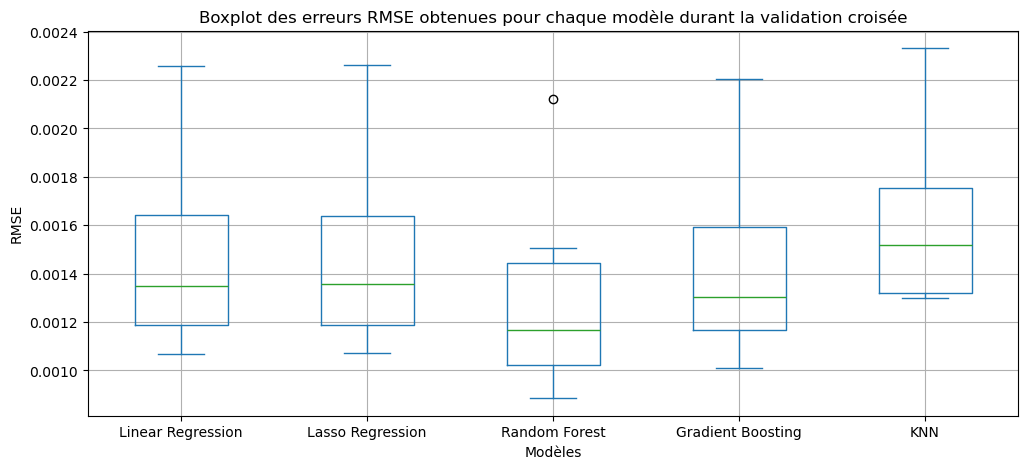

In [164]:
"""Observation de la distribution des erreurs pour chaques modèles"""

scores = pd.DataFrame(rmse_errors)

# Tracer un boxplot pour la variation des valeurs RMSE pour chaque modèle
scores.plot(kind='box', 
            title='Boxplot des erreurs RMSE obtenues pour chaque modèle durant la validation croisée',
            figsize=(12, 5))
plt.ylabel('RMSE')
plt.xlabel('Modèles')
plt.grid(True)
plt.show()